In [1]:
import re

#导入人物字典{人物序号：[姓名列表]}
def get_charadict(infile):
    chara_dict = {}
    for each_line in open(infile).readlines():
        line_content = each_line.strip('\t').split()
        #print(line_content)

        chara_dict[int(line_content[0])] = []
        for i in range(1, len(line_content)):
            chara_dict[int(line_content[0])].append(line_content[i])
    return(chara_dict)

#转换人物字典为姓名字典{姓名：人物序号}
def name_to_index(chara_dict):
    name_dict = {}
    for index in chara_dict.keys():
        for name in chara_dict[index]:
            name_dict[name] = index
    return(name_dict)

#导入论语原文为字典{章节：原文}
def clean_content(infile):
    contents = {}
    for each_line in open(infile,'r').readlines():
        line_content = re.split(r'[()]', each_line)
        contents[line_content[1]] = line_content[2]
    return(contents)

#人物姓名匹配，生成匹配字典{人物序号：[出现章节列表]}
def chara_match(names, contents, cha2con):
    #将所有姓名按长度降序排列
    name = sorted(names, key= lambda x:len(x), reverse= True)

    for n in name:
        pattern = re.compile(n)
        for chapter in contents.keys():
            #在原文中匹配姓名
            result = pattern.findall(contents[chapter])
            #如果有匹配，将原文中姓名替换为'#'，防止重复匹配
            contents[chapter] = re.sub(pattern, '#', contents[chapter])
            for i in range(len(result)):
                cha2con[names[n]].append(chapter)
                #print(n, name, chapter)
    return(cha2con)

In [2]:
#人名匹配
index2name = get_charadict("character.txt")
chara_num = len(index2name.keys())
name2index = name_to_index(index2name)

content_dict = clean_content("analects.txt")
chara2content = {}
for i in range(1, chara_num + 1):
    chara2content[i] = []
chara2content = chara_match(name2index, content_dict, chara2content)

#概念匹配
index2concept = get_charadict('concepts_221.txt')
concept_num = len(index2concept.keys())
concept2index = name_to_index(index2concept)

#匹配原文中的概念
concept2content = {}
for i in range(1, concept_num + 1):
    concept2content[i] = []
concept2content = chara_match(concept2index, content_dict, concept2content)

#对匹配的章节字符串排序
def chapter_num(s):
    slist = s.split('.')
    return(int(slist[0]))

for n in range(1, concept_num + 1):
    #除去重复章节
    concept2content[n] = set(concept2content[n])
    concept2content[n] = list(concept2content[n])
    concept2content[n].sort(key = chapter_num)
    print(n, concept2content[n])

1 ['1.10', '1.1', '1.16', '1.4', '1.5', '1.2', '2.10', '2.22', '3.21', '3.3', '3.15', '3.18', '4.3', '4.5', '4.7', '5.4', '5.9', '5.2', '5.16', '5.11', '5.24', '6.17', '6.28', '6.19', '6.9', '6.8', '6.12', '7.31', '7.21', '7.18', '7.25', '7.30', '7.32', '7.14', '7.28', '7.2', '7.33', '8.6', '8.4', '8.20', '8.10', '9.10', '9.5', '10.12', '10.13', '10.11', '11.24', '11.19', '11.13', '11.25', '11.4', '11.11', '11.21', '11.1', '11.9', '12.22', '12.1', '12.5', '12.2', '12.21', '12.20', '12.13', '13.24', '13.13', '13.11', '13.22', '13.25', '13.15', '13.2', '13.20', '13.19', '13.29', '14.26', '14.43', '14.10', '14.25', '14.37', '14.9', '14.32', '14.40', '14.31', '14.14', '14.45', '14.6', '15.25', '15.14', '15.24', '15.10', '15.18', '15.7', '15.11', '15.22', '15.28', '15.20', '15.23', '15.8', '16.2', '16.8', '16.1', '16.14', '16.11', '16.5', '17.24', '17.6', '17.4', '17.10', '18.4', '18.7', '18.10', '18.6', '18.2', '19.22', '19.3', '19.17', '19.12', '19.21', '19.24', '20.2', '20.3', '20.1']
2 

In [3]:
core_concept = list(concept2content.keys())
'''
#获取核心概念（出现频次大于平均值）
core_concept = []
for k in concept2content.keys():
    if len(concept2content[k]) > 12:
        core_concept.append(k)

#交换个别核心概念的位置，使图更好看
core_concept[2], core_concept[19] = core_concept[19], core_concept[2]
core_concept[3], core_concept[31] = core_concept[31], core_concept[3]
core_concept[4], core_concept[42] = core_concept[42], core_concept[4]
'''

'\n#获取核心概念（出现频次大于平均值）\ncore_concept = []\nfor k in concept2content.keys():\n    if len(concept2content[k]) > 12:\n        core_concept.append(k)\n\n#交换个别核心概念的位置，使图更好看\ncore_concept[2], core_concept[19] = core_concept[19], core_concept[2]\ncore_concept[3], core_concept[31] = core_concept[31], core_concept[3]\ncore_concept[4], core_concept[42] = core_concept[42], core_concept[4]\n'

In [4]:
#概念-章节图，纵向章节，横向概念，交叉点是概念在章节出现的次数
#获得章节-核心概念文档向量
content2coreconcept = {}
for i in range(1, 21):
    content2coreconcept[i] = [0] * len(core_concept)

for i in range(len(core_concept)):
    for c in concept2content[core_concept[i]]:
        chapter = int(c.split('.')[0])
        content2coreconcept[chapter][i] += 1

In [5]:
#获得章节-全部概念文档词频向量
content2concept = {}
for i in range(1, 21):
    content2concept[i] = [0] * len(concept2content)

for i in range(len(concept2content)):
    #print(i)
    for c in concept2content[i+1]:
        chapter = int(c.split('.')[0])
        content2concept[chapter][i] += 1

#获取整部、前半部、后半部-全部概念文档词频向量
whole_part = [0] * len(concept2content)
head_part = [0] * len(concept2content)
tail_part = [0] * len(concept2content)
for i in range(len(content2concept)):
    for j in range(len(concept2content)):
        whole_part[j] += content2concept[i+1][j]
    if i<10:
        for j in range(len(concept2content)):
            head_part[j] += content2concept[i+1][j]
    else:
        for j in range(len(concept2content)):
            tail_part[j] += content2concept[i+1][j]

counts = []
for con in content2concept.keys():
    counts.append(content2concept[con])
counts.append(whole_part)
counts.append(head_part)
counts.append(tail_part)
len(counts[0])

221

In [6]:
counts

[[6,
  1,
  5,
  1,
  4,
  2,
  4,
  3,
  3,
  4,
  3,
  1,
  2,
  1,
  0,
  2,
  1,
  2,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  0,
  0,
  5,
  1,
  1,
  1,
  1,
  2,
  1,
  2,
  0,
  3,
  1,
  1,
  1,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  1,
  2,
  1,
  0,
  2,
  3,
  0,
  1,
  0,
  1,
  2,
  1,
  1,
  1,
  1,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  2,
  2,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  1,
  0,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  1,
  1,
  0,
  1,
  2,
  0,
  1,
  0,
  2,
  1,
  1,
  1,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  1,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  2,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  0,
  1,
  0,
  2,
  0,
  0,
  1,
  0,
  0,
  1,
  0,
  2,
  0,
  4,
  0,
  0,
  0,
  1,
  1,


In [6]:
#获得每一章节的tf-idf文档向量
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(counts).toarray()
tfidf.shape

(23, 221)

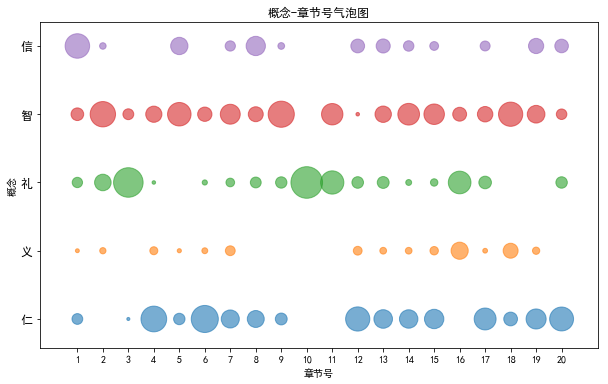

In [28]:
#绘制概念-章节气泡图
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']

chapter = np.arange(1, 21, 1)
appear = tfidf[:-3].T

for i in range(len(core_concept)):
    for j in range(len(chapter)):
        appear[i][j] = (appear[i][j]*10) ** 2

y = {}
for i in range(0, len(core_concept)):
    y[i] = [i + 1] * 20

ylabels = []
for i in range(len(core_concept)):
    ylabels.append(index2concept[core_concept[i]][0])
figure, ax = plt.subplots(figsize= (10, 6))
ax.set_yticks(np.arange(1, len(core_concept)+1, 1))
ax.set_xticks(np.arange(1, 21, 1))
ax.set_xlabel('章节号')
ax.set_ylabel('概念')
ax.set_title('概念-章节号气泡图')
ax.set_yticklabels(ylabels, fontsize=12)

for i in range(0, len(core_concept)):
    plt.scatter(chapter, y[i], s = appear[i]*10, alpha = 0.6)

plt.savefig('core_concept_chapter_bubble.png')
plt.show()


In [7]:
#每章节的概念向量计算相似度，寻找对应相似度最大的章节
def cos_simi(a, b):
    muti_sum = 0
    a_lensqur = 0
    b_lensqur = 0
    for i in range(len(a)):
        muti_sum += a[i] * b[i]
        a_lensqur += a[i]**2
        b_lensqur += b[i]**2
    base = a_lensqur**0.5 * b_lensqur**0.5
    return(muti_sum/ base)

#获得章节-章节相似度矩阵，交叉点为相似度
chapter2simi = {}
for i in range(20):
    chapter2simi[i] = [0]*20

for i in range(20):
    for j in range(i + 1, 20):
        chapter2simi[i][j] = cos_simi(tfidf[i], tfidf[j])
        chapter2simi[j][i] = cos_simi(tfidf[i], tfidf[j])

In [8]:
#获得每篇与整部的相似度
chapter_whole_simi = [0] * 20
for i in range(20):
    chapter_whole_simi[i] = cos_simi(tfidf[i], tfidf[-3])

#获得前半部、后半部与整部的相似度
head_whole_simi = cos_simi(tfidf[-2], tfidf[-3])
tail_whole_simi = cos_simi(tfidf[-1], tfidf[-3])

In [111]:
for i in range(20):
    print(chapter_whole_simi[i])

print(head_whole_simi, tail_whole_simi)

0.8153983239770918
0.872390222693322
0.8758743385421212
0.8743047664244097
0.8983018567314847
0.9225545484208917
0.9121178192904339
0.8621392152796138
0.8976154712583103
0.5567537399947199
0.8808618856864714
0.8919698655816634
0.9065053057840596
0.9391687130978748
0.9347013578944329
0.759357951746399
0.8963800205719027
0.7745552778877199
0.8309927988284623
0.5440706467539044
0.9897692080038384 0.991434711234537


In [9]:
#获得后半部中与前半部章节最匹配的章节
head_tail_match = []
head_tail_simi = []
for i in range(10):
    simi = chapter2simi[i]
    head_tail_match.append(simi.index(max(simi[10:]))+1)
    head_tail_simi.append(max(simi[10:]))
head_tail_sort = sorted(head_tail_simi, reverse=True)

#获得前半部中与后半部章节最匹配的章节
tail_head_match = []
tail_head_simi = []
for i in range(10, 20):
    simi = chapter2simi[i]
    tail_head_match.append(simi.index(max(simi[:10]))+1)
    tail_head_simi.append(max(simi[:10]))
tail_head_sort = sorted(tail_head_simi, reverse=True)

#获得章节重复匹配
maxmatch = []
maxmatch_simi = []
for i in range(20):
    simi = chapter2simi[i]
    maxmatch.append(simi.index(max(simi))+1)
    maxmatch_simi.append(max(simi))
maxmatch_sort = sorted(maxmatch_simi, reverse=True)

#获得章节非重复匹配对
match_couple = [[0] * 2 for row in range(10)]
match_couple_simi = [0] * 10
whole = []
for i in range(0, 20):
    whole.extend(chapter2simi[i])

for i in range(0, 10):
    ind = whole.index(max(whole))
    chapter_a = ind// 20
    chapter_b = ind% 20
    
    if chapter_a < chapter_b:
        match_couple[i][0] = chapter_a+1
        match_couple[i][1] = chapter_b+1
    else:
        match_couple[i][0] = chapter_b+1
        match_couple[i][1] = chapter_a+1
    match_couple_simi[i] = max(whole)

    for j in range(chapter_a * 20, (chapter_a + 1) * 20):
        whole[j] = 0
    for j in range(chapter_b * 20, (chapter_b + 1) * 20):
        whole[j] = 0
    for j in range(0, 20):
        whole[chapter_a + 20 * j] = 0
        whole[chapter_b + 20 * j] = 0

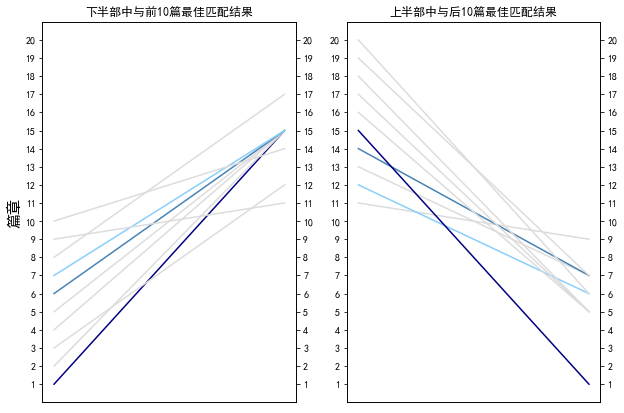

In [13]:
#绘制前后部相似度匹配连线图
from pylab import *
import matplotlib.pyplot as plt
import numpy as np
mpl.rcParams['font.sans-serif'] = ['SimHei']

x = np.arange(1, 3)
c = ['#DCDCDC', '#87CEFA', '#4682B4', '#000080']

fig = plt.figure(figsize = (10, 7))

ax1 = fig.add_subplot(121)
ax1.set_ylim([0, 21])
ax1.set_yticks(np.arange(1, 21, 1))
ax1.set_xticks([])
ax1.set_ylabel('篇章', fontsize=15)
ax1.set_title('下半部中与前10篇最佳匹配结果')
for i in range(1, 11):
    if head_tail_simi[i-1] == head_tail_sort[0]:
        ax1.plot(x, [i, head_tail_match[i-1]], c[-1])
    elif head_tail_simi[i-1] == head_tail_sort[1]:
        ax1.plot(x, [i, head_tail_match[i-1]], c[-2])
    elif head_tail_simi[i-1] == head_tail_sort[2]:
        ax1.plot(x, [i, head_tail_match[i-1]], c[-3])
    else:
        ax1.plot(x, [i, head_tail_match[i-1]], c[0])

ax2 = ax1.twinx()
ax2.set_ylim([0, 21])
ax2.set_yticks(np.arange(1, 21, 1))

ax3 = fig.add_subplot(122)
ax3.set_ylim([0, 21])
ax3.set_yticks(np.arange(1,21,1))
ax3.set_xticks([])
#ax3.set_ylabel('章节', fontsize=15)
ax3.set_title('上半部中与后10篇最佳匹配结果')
for i in range(1, 11):
    if tail_head_simi[i-1] == tail_head_sort[0]:
        ax3.plot(x, [i+10, tail_head_match[i-1]], c[-1])
    elif tail_head_simi[i-1] == tail_head_sort[1]:
        ax3.plot(x, [i+10, tail_head_match[i-1]], c[-2])
    elif tail_head_simi[i-1] == tail_head_sort[2]:
        ax3.plot(x, [i+10, tail_head_match[i-1]], c[-3])
    else:
        ax3.plot(x, [i+10, tail_head_match[i-1]], c[0])

ax4 = ax3.twinx()
ax4.set_ylim([0, 21])
ax4.set_yticks(np.arange(1, 21, 1))

plt.savefig('head_tail_similarity_221.png')
plt.show()

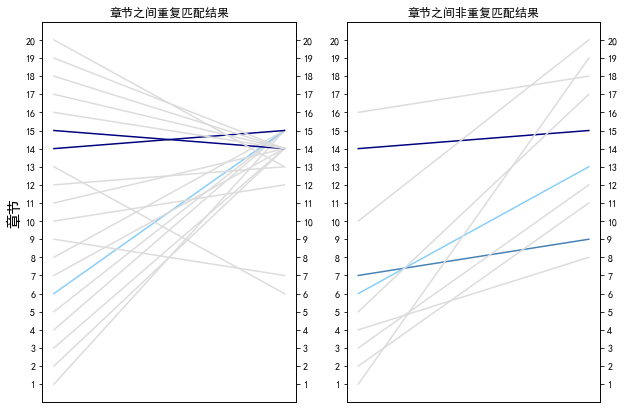

In [114]:
#绘制章节重复/非重复匹配相似图
fig = plt.figure(figsize = (10, 7))

ax1 = fig.add_subplot(121)
ax1.set_ylim([0, 21])
ax1.set_yticks(np.arange(1, 21, 1))
ax1.set_xticks([])
ax1.set_ylabel('章节', fontsize=15)
ax1.set_title('章节之间重复匹配结果')
for i in range(1, 21):
    if maxmatch_simi[i-1] == maxmatch_sort[0]:
        ax1.plot(x, [i, maxmatch[i-1]], c[-1])
    elif maxmatch_simi[i-1] == maxmatch_sort[1]:
        ax1.plot(x, [i, maxmatch[i-1]], c[-2])
    elif maxmatch_simi[i-1] == maxmatch_sort[2]:
        ax1.plot(x, [i, maxmatch[i-1]], c[-3])
    else:
        ax1.plot(x, [i, maxmatch[i-1]], c[0])

ax2 = ax1.twinx()
ax2.set_ylim([0, 21])
ax2.set_yticks(np.arange(1, 21, 1))

ax3 = fig.add_subplot(122)
ax3.set_ylim([0, 21])
ax3.set_yticks(np.arange(1,21,1))
ax3.set_xticks([])
#ax3.set_ylabel('章节', fontsize=15)
ax3.set_title('章节之间非重复匹配结果')
for i in range(10):
    if i == 0:
        ax3.plot(x, match_couple[i], c[-1])
    elif i == 1:
        ax3.plot(x, match_couple[i], c[-2])
    elif i == 2:
        ax3.plot(x, match_couple[i], c[-3])
    else:
        ax3.plot(x, match_couple[i], c[0])

ax4 = ax3.twinx()
ax4.set_ylim([0, 21])
ax4.set_yticks(np.arange(1, 21, 1))

plt.savefig('chapter_match_onegram3.png')
plt.show()